In [1]:
import matplotlib
%matplotlib inline
import pymsz
from pylab import *
from readsnapsgl import readsnapsgl
fy_map=np.loadtxt("/home2/weiguang/scratch-SZ/old_test/ymap_cl00001_z0.00.txt")
Tszdata = np.loadtxt("/home2/weiguang/Downloads/y_particles_list_cl00001_z0.00_NR.txt")

In [2]:
sname="/home2/weiguang/MUSIC/MULTIDARK_ADIABAT/CLUSTER_00001/snap_014"
cc = [499900,500342.75786,499116.22043]

In [11]:
simd = pymsz.load_data(sname, snapshot=True, center=cc,radius=4000)

In [ ]:
# simmod = pymsz.TT_model(simd)
simmod = pymsz.TT_model(simd, npixel=2048, SD=2)
# simmodnp = pymsz.TT_model(simd, npixel=1024)
# ids = (simd.pos[:,2] > -2500) & (simd.pos[:,2] < 2500) & (simd.pos[:,1] > -2500) & (simd.pos[:,1] < 2500) & (simd.pos[:,0] > -2500) & (simd.pos[:,0] < 2500)

In [12]:
simmod3 = pymsz.TT_model(simd, npixel=200, SD=3)

In [ ]:
simmod.write_fits_image("Test", clobber=True)

In [6]:
print(simmod.ydata.sum(),simd.Tszdata.sum(),simd.Tszdata.sum()/(simmod.pxs)**2,fy_map.sum(), Tszdata.sum())

(3.4134555, 339.68359898671025, 3.4134563086410812, 3.2241624182816029, 1216722013.3573914)


In [ ]:
print(simd.pos)
# from pymsz.rotate_data import SPH_smoothing
y1=pymsz.rotate_data.SPH_smoothing(simd.Tszdata, simd.pos, 10, hsml=simd.hsml, Ncpu=10, pxln=500)

[[ 1085.65625   389.36714   -95.34543]
 [ 1085.5       377.80464  -108.22043]
 [ 1079.28125   375.58589   -96.68918]
 ..., 
 [  107.0625   -248.44536   777.74832]
 [  124.5625   -236.97661   779.87332]
 [  128.46875  -224.60161   772.46707]]


In [ ]:
print(simd.pos)
y2=SPH_smoothing(simd.Tszdata, simd.pos, 10, hsml=simd.hsml, pxln=1024)

[[ 1085.65625   389.36714   -95.34543]
 [ 1085.5       377.80464  -108.22043]
 [ 1079.28125   375.58589   -96.68918]
 ..., 
 [  107.0625   -248.44536   777.74832]
 [  124.5625   -236.97661   779.87332]
 [  128.46875  -224.60161   772.46707]]


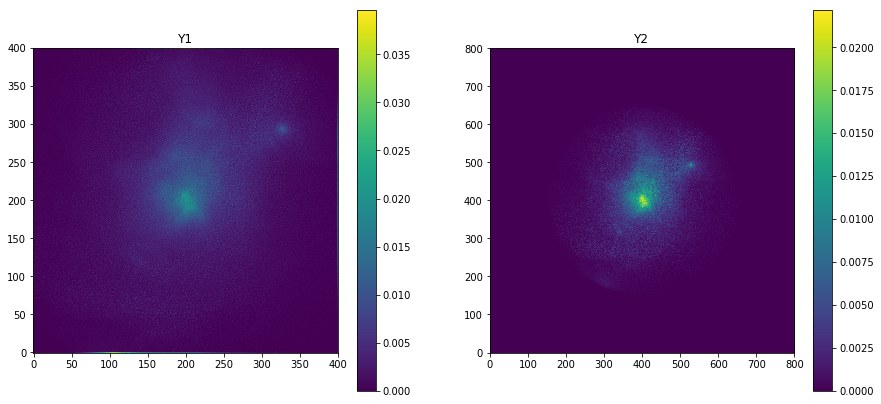

In [22]:
figure(figsize=(15,7))
subplot(121)
imshow(np.sum(y1,axis=2),origin='lower')
colorbar()
title("Y1")
subplot(122)
# imshow(NH/(3.0856775809623245e+21/simd.cosmology["h"]*simmod.pxs)**2,origin='lower',vmax=0.0002)
# g = Gaussian2DKernel(stddev=2)
# imshow(convolve(simmodnp.ydata,g),origin='lower')
imshow(np.sum(y2,axis=2),origin='lower')
colorbar()
title("Y2")

In [6]:
print(48.816029*4.87091064453125, 23.835945*9.9756250000000009, fy_map.sum(), Tszdata.sum())

(237.7785152798462, 237.778448840625, 3.2241624182816029, 1216722013.3573914)


<h1><center>Comparison between 2D and 3D meshes</center></h1>

(0.42642082894665401, 0.4264208289275791, 381.34289935161468, 29.904531250000002)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide


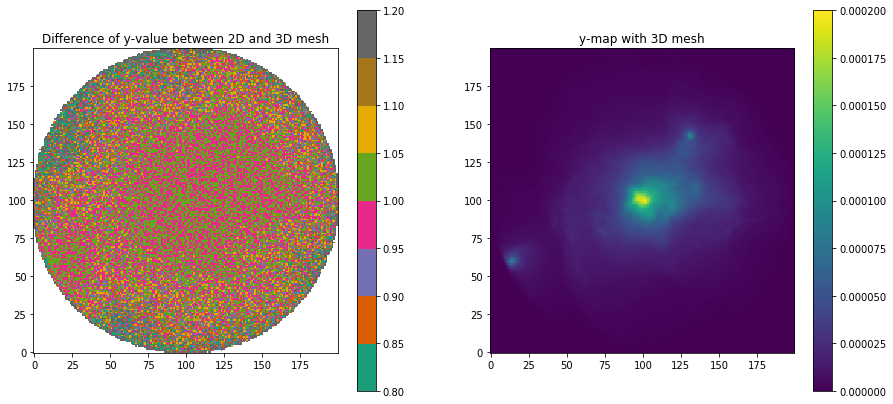

In [6]:
# NH,x,y=np.histogram2d(simd.pos[ids,0],simd.pos[ids,1], bins=(500,500),weights=simd.Tszdata[ids])
# NH2,x,y=np.histogram2d(Tszdata[:,0],Tszdata[:,1], bins=(500,500),weights=Tszdata[:,3])
# simmod = pymsz.TT_model(simd, npixel=200, SD=2)
# simmod3 = pymsz.TT_model(simd, npixel=200, SD=3)
print(simmod.ydata.sum(), simmod3.ydata.sum(), simd.Tszdata.sum(), simmod.pxs)
# from astropy.convolution import Box2DKernel, Gaussian2DKernel, Kernel2D, Model2DKernel, Tophat2DKernel, AiryDisk2DKernel, convolve
figure(figsize=(15,7))
subplot(121)
# imshow(fy_map,origin='lower',vmax=0.0002)
imshow(simmod.ydata.T/simmod3.ydata.T,origin='lower', cmap="Dark2", vmin=0.8, vmax=1.2)
colorbar()
title("Difference of y-value between 2D and 3D mesh")
subplot(122)
imshow(simmod3.ydata.T,origin='lower',vmax=0.0002)
# g = Gaussian2DKernel(stddev=2)
# imshow(convolve(simmodnp.ydata,g),origin='lower')
colorbar()
title("y-map with 3D mesh")
savefig("pymsz_ymap_difference_between_2D-3D_mesh.png")

<h1><center>Comparison between My y-map and Federico's y-map</center></h1>


(4.1498017068534727, 3.2241624182816029, 422.89347695296607, 10.0)


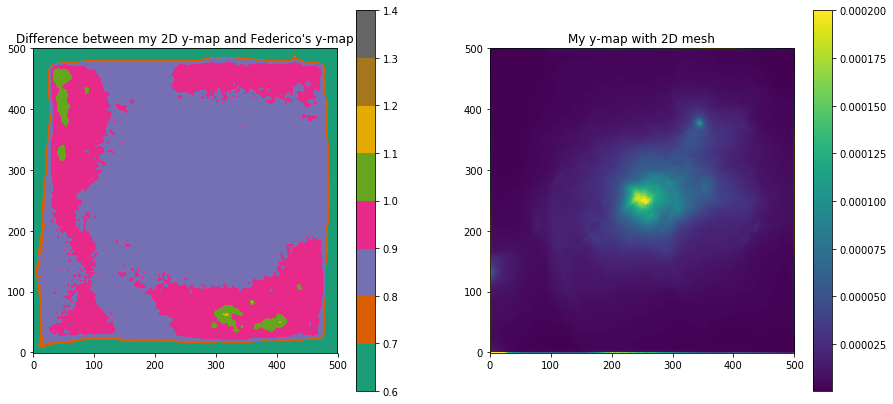

In [22]:
# simmodt = pymsz.TT_model(simd, AR=7.02597468739544, redshift=0.1, zthick=2500)
print(simmodt.ydata.sum(), fy_map.sum(), simd.Tszdata.sum(), simmodt.pxs)
# from astropy.convolution import Box2DKernel, Gaussian2DKernel, Kernel2D, Model2DKernel, Tophat2DKernel, AiryDisk2DKernel, convolve
figure(figsize=(15,7))
subplot(121)
imshow(fy_map/simmodt.ydata.T,origin='lower', cmap="Dark2", vmin=0.6, vmax=1.4)
colorbar()
title("Difference between my 2D y-map and Federico's y-map")
subplot(122)
imshow(simmodt.ydata.T,origin='lower',vmax=0.0002)
# g = Gaussian2DKernel(stddev=2)
# imshow(convolve(simmodnp.ydata,g),origin='lower')
colorbar()
title("My y-map with 2D mesh")
savefig("pymsz_ymap_difference_between_my2D-Federico.png")

In [22]:
head = readsnapsgl(sname, "HEAD")
pos = readsnapsgl(sname,"POS ")[:head[0][0]]
ids = (pos[:,2]>cc[2]-2500)&(pos[:,2]<cc[2]+2500)&(pos[:,1]>cc[1]-2500)&(pos[:,1]<cc[1]+2500)&(pos[:,0]>cc[0]-2500)&(pos[:,0]<cc[0]+2500)
pos = pos[ids]
temp = readsnapsgl(sname,"U   ")[:head[0][0]][ids]
rho = readsnapsgl(sname,"RHO ")[:head[0][0]][ids]
# NE = readsnapsgl(sname,"NE  ")[:head[0][0]][ids]
mas = readsnapsgl(sname,"MASS")[:head[0][0]][ids]
hsml = readsnapsgl(sname,"HSML")[:head[0][0]][ids]

('detected file format endian = ', '>')
Snapshot with Gadget 3 format with blocks
('detected file format endian = ', '>')
Snapshot with Gadget 3 format with blocks
(u'POS ', 384162996)
('detected file format endian = ', '>')
Snapshot with Gadget 3 format with blocks
(u'POS ', 384162996)
(u'VEL ', 384162996)
(u'ID  ', 128054332)
(u'MASS', 67153212)
(u'U   ', 28770304)
('detected file format endian = ', '>')
Snapshot with Gadget 3 format with blocks
(u'POS ', 384162996)
(u'VEL ', 384162996)
(u'ID  ', 128054332)
(u'MASS', 67153212)
(u'U   ', 28770304)
(u'RHO ', 28770304)
('detected file format endian = ', '>')
Snapshot with Gadget 3 format with blocks
(u'POS ', 384162996)
(u'VEL ', 384162996)
(u'ID  ', 128054332)
(u'MASS', 67153212)
('detected file format endian = ', '>')
Snapshot with Gadget 3 format with blocks
(u'POS ', 384162996)
(u'VEL ', 384162996)
(u'ID  ', 128054332)
(u'MASS', 67153212)
(u'U   ', 28770304)
(u'RHO ', 28770304)
(u'HSML', 28770304)


In [7]:
from astropy.cosmology import FlatLambdaCDM, WMAP7
cosmo = FlatLambdaCDM(H0=simd.cosmology['h'] * 100, Om0=simd.cosmology['omega_matter'])

In [8]:
cosmo.arcsec_per_kpc_comoving(0.1).value / simd.cosmology['h']

0.702597468739544

In [9]:
simmod2 = pymsz.TH_model(simd, npixel=1024, redshift=0.3, AR=3.5)

In [10]:
print(simmod.ydata.sum(), simmod2.ydata.sum())
print(simmod.ydata.shape, simmod2.ydata.shape)

(26.461422, 18.529415)
((500, 500), (1024, 1024))


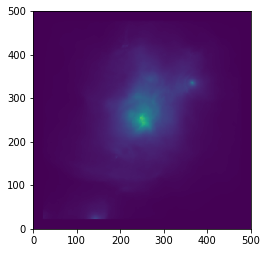

In [11]:
imshow(simmod2.ydata,origin='lower',vmax=0.0002)

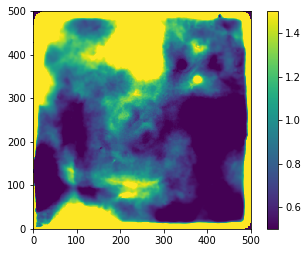

In [15]:
newdata=np.copy(simmod.ydata[:500,:500])
ids=fy_map>0
newdata[ids]/=fy_map[ids]
imshow(newdata,origin='lower',vmax=1.5,vmin=0.5)
colorbar()

In [5]:
print(fy_map.sum(),simmod.ydata.sum(),simd.Tszdata.sum()*3.0856775809623245e+21*10, simny.ydata.sum())

(3.2241624182816029, 0.27489114, 0.19289414237126265, 0.27489135)


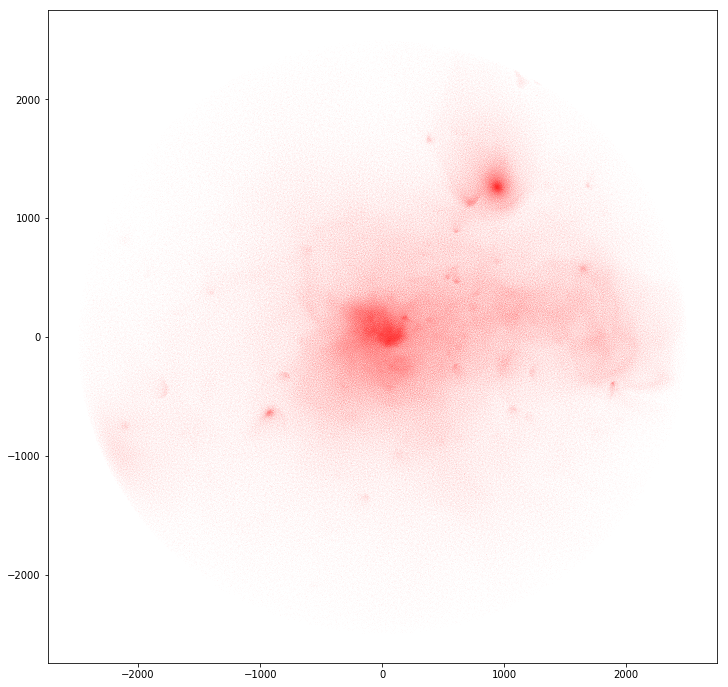

In [11]:
figure(figsize=(12,12))
plot(simd.pos[:,0],simd.pos[:,1],'r.',ms=0.01)

In [26]:
simd = readsnapsgl("/home2/weiguang/MUSIC/MULTIDARK_ADIABAT/CLUSTER_00001/snap_014","POS ")

('detected file format endian = ', '>')
Snapshot with Gadget 3 format with blocks
(u'POS ', 384162996)


In [27]:
cc=[499900,500342.75786,499116.22043]; rr=2500
ids=(simd[:,0]>cc[0]-rr)&(simd[:,0]<=cc[0]+rr)&\
    (simd[:,1]>cc[1]-rr)&(simd[:,1]<=cc[1]+rr)&\
    (simd[:,2]>cc[2]-rr)&(simd[:,2]<=cc[2]+rr)

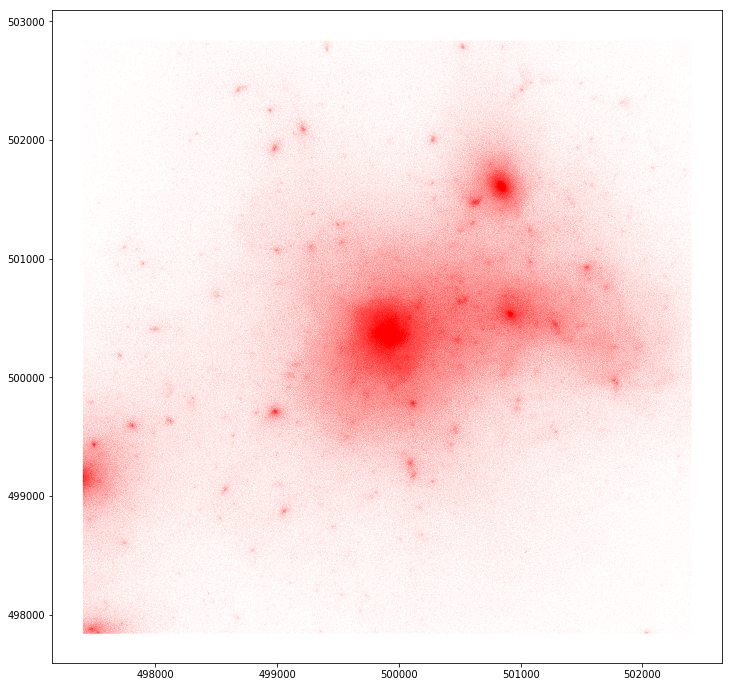

In [28]:
figure(figsize=(12,12))
plot(simd[ids,0],simd[ids,1],'r.',ms=0.01)

### position and data dimension are the same
### metallicity is also the same (for sp without additional SFR cut)

In [ ]:
import yt
from yt.frontends.gadget.definitions import gadget_field_specs
gadget_field_specs["my_def"] = My_def
ds = yt.load("/home2/weiguang/The300/data/simulation/GadgetX/NewMDCLUSTER_0010/snap_128", field_spec="my_def")
sp = ds.sphere(center=[500000,500000,500000],radius=400)

In [ ]:
NED = sp['Gas','ElectronAbundance']*sp['Gas','Density']*(1 - sp['Gas','Z'] - 0.24)

In [ ]:
from yt.utilities.physical_constants import mp, kb, cross_section_thompson_cgs, \
        solar_mass, mass_electron_cgs, speed_of_light_cgs
from yt.utilities.physical_ratios import cm_per_kpc as Kpc

In [ ]:
NED2 = NED/mp
NED2.in_cgs()

In [ ]:
# The electron number density are the same !!
simned = simd.ne/mp.v * (1.0e10*solar_mass.v*simd.cosmology["h"]**2/Kpc**3)
simned

In [ ]:
simTsz = simned*kb.v*simd.temp*cross_section_thompson_cgs.v/mass_electron_cgs.v/speed_of_light_cgs.v**2
simTsz

In [ ]:
Tsz = NED2 *kb*sp['Gas','Temperature']*cross_section_thompson_cgs/mass_electron_cgs/speed_of_light_cgs**2
Tsz.in_cgs()

In [ ]:
Tsz

In [ ]:
from yt.units import cm
Tsz.in_cgs()*800/simd.cosmology["h"]*Kpc*cm

In [ ]:
def Ele_num_den(field, data):
    print(field.name)
    return data["Gas", "Density"] * data["Gas", "ElectronAbundance"] * (1 - data["Gas", "Z"] - 0.24) / mp


def Temp_SZ(field, data):
    print("Field",field.name)
    return data["Gas", "END"] * data['Gas', 'Temperature'] * kb * cross_section_thompson_cgs / \
        mass_electron_cgs / speed_of_light_cgs**2

In [ ]:
ds.add_field(("Gas", "Tsz"),function =Temp_SZ, sampling_type="particle",force_override=True, units="1/cm")

In [ ]:
ds.all_data()[("Gas", "END")].in_cgs()

In [ ]:
ds.all_data()[("Gas", "Tsz")]

In [ ]:
sp["Gas", "END"]

In [ ]:
sp[("Gas", "Tsz")]

In [ ]:
ds.add_smoothed_particle_field(("Gas", "Tsz"),nneighbors=16)

In [ ]:
figure(figsize=[9,9])
imshow(simy.ydata,origin='lower')
colorbar()

In [ ]:
print(simy.ydata.sum(),simy.Tszdata.sum(),sp[("Gas", "Tsz")].sum(),sp[('deposit', 'Gas_smoothed_Tsz')].sum(), sp[('gas', 'szy')].sum())

In [ ]:
figure(figsize=(15,6))
subplot(121)
scatter(simd.pos[:,0],simd.pos[:,1],s=1,c=simy.Tszdata)
colorbar()
subplot(122)
scatter(sp[('Gas','Coordinates')][:,0],sp[('Gas','Coordinates')][:,1],s=1,c=sp[("Gas", "Tsz")])
colorbar()

In [ ]:
yt.SlicePlot(ds,'z',('deposit', 'Gas_smoothed_Tsz'),center=[500000, 500000, 500000], width=(800,'kpc/h'),data_source=sp)

In [ ]:
sphm=sp[('deposit', 'Gas_smoothed_Tsz')]

In [ ]:
projection = ds.proj(('gas', 'density'), 'z', center=[500000, 500000, 500000])

In [ ]:
frb=projection.to_frb(400, 800)

In [ ]:
frb['Gas_smoothed_Tsz']

In [ ]:
yt.SlicePlot(ds, 'z', ('gas', 'szy'), center=[500000, 500000, 500000], width=(400,'kpc/h'))

In [ ]:
def proper_gas(pfilter, data):
    filter = data[pfilter.filtered_type, "Density"] < 1.0e-6
    return filter

In [ ]:
if len(sp['Gas',"Density"][sp['Gas',"Density"]>=1.0e-6]) > 0:
    yt.add_particle_filter("PGas", function=proper_gas, filtered_type='Gas', requires=["Density"])
    ds.add_particle_filter('PGas')
    print("Add PGas")

In [ ]:
sp.ds.derived_field_list